In [75]:
#Author: Gu Sheng 

In [76]:
import pandas as pd
import numpy as np
#load data (bank.csv, smaller sample)
bank=pd.read_csv('bank.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [77]:
# Normalize
y=bank.iloc[:,16].values
y=np.where(y=='no', 0 ,1)
y

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
X=np.zeros((4521,16))
X=bank.iloc[:, :16].values

X[:,1]=np.where(X[:,1]=='admin.',0,
            np.where(X[:,1]=='unknown',1, 
            np.where(X[:,1]=='unemployed',2,
            np.where(X[:,1]=='management',3,
            np.where(X[:,1]=='housemaid',4, 
            np.where(X[:,1]=='entrepreneur',5, 
            np.where(X[:,1]=='student',6, 
            np.where(X[:,1]=='blue-collar',7, 
            np.where(X[:,1]=='self-employed',8, 
            np.where(X[:,1]=='retired',9, 
            np.where(X[:,1]=='technician',10, 11
            ))))))))))) 
                   #admin.=0, unknown=1, unemployed=2, management=3, housemaid=4, entrepreneur=5, student=6, blue-collar=7
                    #self-employed=8, retired=9, technician=10, service=11
X[:,2]=np.where(X[:,2]=='married',0,np.where(X[:,1]=='divorced',1,2))#married=0,divorced=1, single=2
X[:,3]=np.where(X[:,3]=='unknown',0,
                np.where(X[:,1]=='secondary',1,
                np.where(X[:,1]=='primary',2,3))) #unknown=0, secondary=1, primary=2, tertiary=3
X[:,4]=np.where(X[:,4]=='no',0,1)#default: no=0, yes=1
X[:,6]=np.where(X[:,6]=='no',0,1)#housing: no=0,yes=1
X[:,7]=np.where(X[:,7]=='no',0,1)#loan: no=0,yes=1
X[:,8]=np.where(X[:,8]=='unknown',0,np.where(X[:,8]=='telephone',1,2)) #contact: unknown=0,telephone=1, celluar=2
X[:,10]=np.where(X[:,10]=='jan',0,
            np.where(X[:,1]=='feb',1, 
            np.where(X[:,1]=='mar',2,
            np.where(X[:,1]=='apr',3,
            np.where(X[:,1]=='may',4, 
            np.where(X[:,1]=='jun',5, 
            np.where(X[:,1]=='jul',6, 
            np.where(X[:,1]=='aug',7, 
            np.where(X[:,1]=='sep',8, 
            np.where(X[:,1]=='oct',9, 
            np.where(X[:,1]=='nov',10, 11
            ))))))))))) 
X[:,15]=np.where(X[:,15]=='unknown',0,
                np.where(X[:,15]=='other',1,
                np.where(X[:,15]=='failure',2,3)))#poutcome: unknown=0, other=1, failure=2, success=3
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
age=X[:,0].reshape(-1,1)
sc.fit(age)
X[:,0]=sc.transform(age).reshape(-1)
bal=X[:,5].reshape(-1,1)
sc.fit(bal)
X[:,5]=sc.transform(bal).reshape(-1)

C:\Users\13320\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [79]:
#Devide training/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(
                    X, y, test_size=0.3, random_state=0)

In [80]:
#Preceptron model
X_train_25=X_train[:,[1,4]]
X_test_25=X_test[:,[1,4]]
from sklearn.linear_model import Perceptron
ppn=Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_25, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [81]:
#Check the accuracy
y_pred_25=ppn.predict(X_test_25)
from sklearn.metrics import accuracy_score
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_25))
print(y_test, y_pred_25)

Accuracy: 0.8769
[0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]


In [82]:
#Plot the outcome
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier,
                         test_idx=None, resolution=0.02):
    markers=('s', 'x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max=X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max=X[:,1].min()-1, X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max, resolution),
                       np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #plot all samples
    X_test, y_test=X[test_idx, :], y[test_idx] 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)
    
    #highlight test samples
    if test_idx:
        X_test, y_test =X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='',edgecolor='black', 
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label='test set')

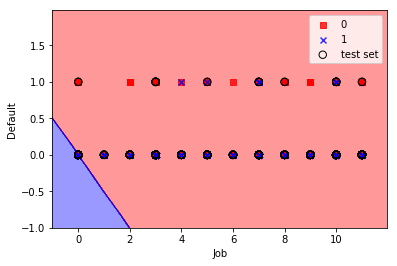

In [83]:
X_combined_25=np.vstack((X_train_25, X_test_25))
y_combined_25=np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_25, 
                     y=y_combined_25,
                     classifier=ppn,
                     test_idx=range(3164, 4521))
plt.xlabel('Job')
plt.ylabel('Default')
plt.legend(loc='best')
plt.show()

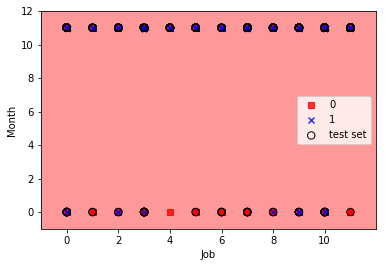

Accuracy: 0.8769


In [84]:
#Logistic model change variables
X_train_211=X_train[:,[1,10]]
X_test_211=X_test[:,[1,10]]
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_211, y_train)
X_combined_211=np.vstack((X_train_211, X_test_211))
y_combined_211=np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_211, 
                     y=y_combined_211,
                     classifier=lr,
                     test_idx=range(3164, 4521))
plt.xlabel('Job')
plt.ylabel('Month')
plt.legend(loc='best')
plt.show()
#Check the accuracy
y_pred_211=lr.predict(X_test_211)
from sklearn.metrics import accuracy_score
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_211))


In [85]:
#Logistic model
X_train_2311=X_train[:,[1,2,10]]
X_test_2311=X_test[:,[1,2,10]]
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_2311, y_train)
X_combined=np.vstack((X_train_2311, X_test_2311))
y_combined=np.hstack((y_train, y_test))

#Check the accuracy
y_pred_2311=lr.predict(X_test_2311)
from sklearn.metrics import accuracy_score
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_2311))

Accuracy: 0.8769


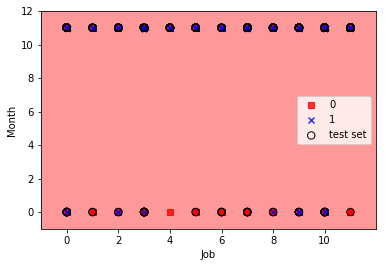

Accuracy: 0.8769


In [86]:
#SVM model
X_train_211=X_train[:,[1,10]]
X_test_211=X_test[:,[1,10]]
from sklearn.svm import SVC
svm=SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_211, y_train)
X_combined_211=np.vstack((X_train_211, X_test_211))
y_combined_211=np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_211, 
                     y=y_combined_211,
                     classifier=svm,
                     test_idx=range(3164, 4521))
plt.xlabel('Job')
plt.ylabel('Month')
plt.legend(loc='best')
plt.show()
#Check the accuracy
y_pred_211=svm.predict(X_test_211)
from sklearn.metrics import accuracy_score
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_211))

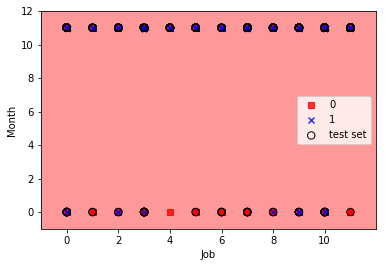

Accuracy: 0.88


In [87]:
#tree model
X_train_211=X_train[:,[1,10]]
X_test_211=X_test[:,[1,10]]
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',
                           max_depth=3, random_state=0)
tree.fit(X_train_211, y_train)
X_combined_211=np.vstack((X_train_211, X_test_211))
y_combined_211=np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_211, 
                     y=y_combined_211,
                     classifier=tree,
                     test_idx=range(3164, 4521))
plt.xlabel('Job')
plt.ylabel('Month')
plt.legend(loc='best')
plt.show()
#Check the accuracy
y_pred_211=tree.predict(X_test_211)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_211))

Accuracy: 0.7900


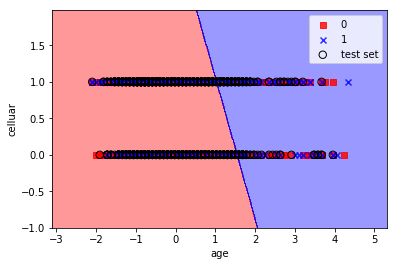

In [88]:
import numpy as np
X_age_cel=np.zeros((4521,2))
X_age_cel[:,0]=X[:,0]
X_age_cel[:,1]=np.where(X[:,8]==2,1,0)
#Devide training/test sets
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train, y_test= train_test_split(
                    X_age_cel, y, test_size=0.3, random_state=0)
#Preceptron model
from sklearn.linear_model import Perceptron
ppn=Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_1, y_train)

#Check the accuracy
y_pred=ppn.predict(X_test_1)
from sklearn.metrics import accuracy_score
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
X_combined=np.vstack((X_train_1, X_test_1))
y_combined=np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined, 
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(3164, 4521))
plt.xlabel('age')
plt.ylabel('celluar')
plt.legend(loc='best')
plt.show()